## Huffman

In [15]:
from queue import PriorityQueue
from collections import Counter
import time
import os
import sys

In [3]:
class Node:
    """
    This code represent one node for the Huffman tree.
    """
    def __init__(self, frequency, character=None) -> None:
        """
        The constructor for a class.
        """
        self.frequency = frequency
        self.character = character
        self.left = None
        self.right = None

    def __lt__(self, other) -> bool:
        """
        This method compare two nodes by their frequencies.
        """
        return self.frequency < other.frequency


class Huffman:
    """
    This class represent Huffman algorithm.
    """
    def __init__(self) -> None:
        """
        The constructor for a class.
        """
        self.codes = {}

    def encode(self, text):
        """
        This method implement Huffman encoding.
        """
        frequency_dict = Counter(text)
        queue = PriorityQueue() # initializing the priority queue
        for char, freq in frequency_dict.items():
            queue.put(Node(freq, char))

        while queue.qsize() > 1: # iterating through the whole queue
            node1, node2 = queue.get(), queue.get() # getting two elements that occur most rarely
            merged_node = Node(node1.frequency + node2.frequency) # creating new node by adding them
            merged_node.right, merged_node.left = node1, node2 # setting
    # the node with higher frequency to the right according to the new node, and lower to the left.
            queue.put(merged_node) # adding new node to the queue.

        root = queue.get() # the last node in the queue is the root node of the Huffman tree
        stack = [(root, "")] # setting the stack

        while stack:
            node, code = stack.pop()
            if node.character: # checking if the node has it's character
                self.codes[node.character] = code
            else:
                stack.append((node.left, code + "0"))
                stack.append((node.right, code + "1"))
        coded = [self.codes[elem] for elem in text]
        ret_dct = {}
        for ind in range(len(text)):
            ret_dct[coded[ind]] = text[ind]
        return coded, ret_dct

    def decode(self, code, dct) -> str:
        """
        Decoding by huffman
        """
        text = ""
        for cod in code:
            try:
                text += dct[cod]
            except:
                return "Wrong input"
        return text


def read_file(name):
    """
    Reads file
    """
    with open(name, "r", encoding="utf-8") as fff:
        lines = fff.readlines()
    lines = "".join(lines)
    return lines

Щоб перевірити як працює кодування Гаффманом запусти код нижче, також під графіком є інформація про кодування великого файлика, дані про який псували графік.

text (Чорна пантера і білий ведмідь) size: 0.205283 mb
Time taken to encode Чорна пантера і білий ведмідь: 0.04400181770324707 seconds
text (Місто) size: 0.918245 mb
Time taken to encode misto: 0.16017532348632812 seconds
text (злочин і кара) size: 1.935359 mb
Time taken to encode злочин і кара: 0.5117614269256592 seconds
text (Божественна комедія) size: 4.857571 mb
Time taken to encode божестввенна комедія: 1.036623239517212 seconds


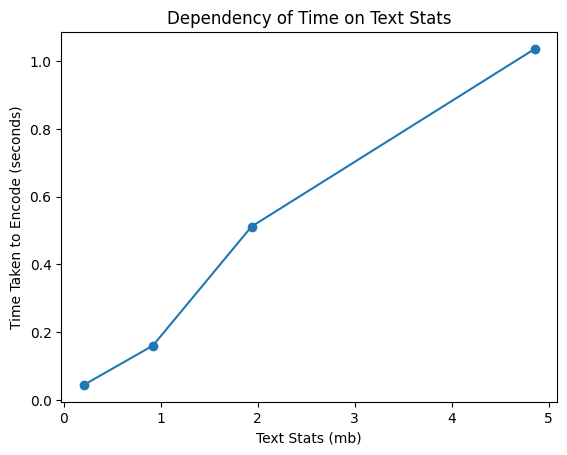

Time taken to decode божестввенна комедія: 1.761129379272461 seconds
text (location.list) size: 97.622104 mb
Time taken to encode locations: 22.669260025024414 seconds


In [26]:
alg = Huffman()

strr2 = read_file("black and white.txt")
text_stats2 = os.stat("black and white.txt")[6]/1000000
print(f"text (Чорна пантера і білий ведмідь) size: {text_stats2} mb")
start_time = time.time()  # record the start time
code, dct = alg.encode(strr2)
end_time = time.time()  # record the end time
time_2 = end_time - start_time
print("Time taken to encode Чорна пантера і білий ведмідь:", time_2, "seconds")

strr1 = read_file("misto.txt")
text_stats1 = os.stat("misto.txt")[6]/1000000
print(f"text (Місто) size: {text_stats1} mb")
start_time = time.time()  # record the start time
code, dct = alg.encode(strr1)
end_time = time.time()  # record the end time
time_1 = end_time - start_time
print("Time taken to encode misto:", time_1, "seconds")


strr = read_file("text.txt")
text_stats = os.stat("text.txt")[6]/1000000
print(f"text (злочин і кара) size: {text_stats} mb")
start_time = time.time()  # record the start time
code, dct = alg.encode(strr)
end_time = time.time()  # record the end time
time_ = end_time - start_time
print("Time taken to encode злочин і кара:", time_, "seconds")


strr4 = read_file("god's-comedy.txt")
text_stats4 = os.stat("god's-comedy.txt")[6]/1000000
print(f"text (Божественна комедія) size: {text_stats4} mb")
start_time = time.time()  # record the start time
code, dct = alg.encode(strr4)
end_time = time.time()  # record the end time
time_4 = end_time - start_time
print("Time taken to encode божестввенна комедія:", time_4, "seconds")

import matplotlib.pyplot as plt

text_stats_values = [text_stats2, text_stats1, text_stats, text_stats4] # replace with your own values
time_values = [time_2, time_1, time_, time_4] # replace with your own values

plt.plot(text_stats_values, time_values, '-o')

plt.xlabel('Text Stats (mb)')
plt.ylabel('Time Taken to Encode (seconds)')
plt.title('Dependency of Time on Text Stats')

plt.show()


start_time = time.time()  # record the start time
decoded_str = alg.decode(code, dct)
end_time = time.time()  # record the end time
time_4 = end_time - start_time
print("Time taken to decode божестввенна комедія:", time_4, "seconds")


strr3 = read_file("location.txt")
text_stats3 = os.stat("location.txt")[6]/1000000
print(f"text (location.list) size: {text_stats3} mb")
start_time = time.time()  # record the start time
code_locations, dct_locations = alg.encode(strr3)
end_time = time.time()  # record the end time
time_3 = end_time - start_time
print("Time taken to encode locations:", time_3, "seconds")

# code_stats = os.stat("code.txt")

## LZW

In [24]:
class LZW:
    """
    class for coding and uncoding
    """
    def encode(self, text) -> str:
        """
        Encoding the text by LZW
        """
        letters = sorted(list(set(text)))
        code_dict = []      #there is the list where code of elm is it's index
        for letter in letters:
            code_dict.append(letter)
        ret_dict = code_dict
        coded = bytearray()
        # coded = []
        line = text[0]
        for ind in range(len(text)):
            if ind != len(text) - 1:
                next = text[ind + 1]
            line += next
            if line not in code_dict:
                if len(code_dict) < 255:
                    code_dict.append(line)
                coded.append(code_dict.index(line[:-1]))
                line = next
                continue
            else:
                continue
        return coded, ret_dict

    def decode(self, coded, dct: list) -> str:
        """
        Decoding by lzw
        """
        decoded = ""
        thresh = 0
        for elm in coded:
            if (len(dct) - 1) >= int(elm):
                decoded += dct[int(elm)]
            else:
                flag = True
                for ind in range(thresh, len(decoded)-2):
                    if flag:
                        line = decoded[ind:ind + 2]
                    if line not in dct:
                        dct.append(line)
                        flag = True
                    else:
                        line += decoded[ind + 2]
                        flag = False
                if (len(dct) - 1) >= int(elm):
                    decoded += dct[int(elm)]
                else:
                    print("wrong code")
                    return None
                thresh = len(decoded) - 1 - len(line) - 1
        return decoded


def read_file(name):
    """
    Reads file
    """
    with open(name, "r", encoding="utf-8") as fff:
        lines = fff.readlines()
    lines = "".join(lines)
    return lines

def write_file(name, text):
    """
    Writes file
    """
    if isinstance(text, str):
        with open(name, "w", encoding="utf-8") as fff:
            fff.write(text)
        return None
    with open(name, "wb") as fff:
        fff.write(text)
    return None


Запусти код нижче, щоб побачити наскільки стискає LZW. Результати вимірюються відносно початкового файлу з текстом і кінцевого файлу, в який записано результат кодування. Під час декодування, ми передаємо методу закодований текст у вигляді bytearray і ліст в якому записані тільки початкові одиничні символи, щоб метод розумів з чого починати і в процесі добудовує словник сам. В кінці виводу можна побачити, що до і після кодування об'єм файлу залишається сталим.

In [27]:
code = LZW()
strr = read_file("god's-comedy.txt")
cod, dct = code.encode(strr)
write_file("code.txt", cod)
text_stats_before = os.stat("god's-comedy.txt")[6]/1000000
text_stats_after = os.stat("code.txt")[6]/1000000
print(f"text size (божественна комедія) before: {text_stats_before} mb")
print(f"text size (божественна комедія) after: {text_stats_after} mb")

print()

strr = read_file("misto.txt")
cod, dct = code.encode(strr)
write_file("code.txt", cod)
text_stats_before = os.stat("misto.txt")[6]/1000000
text_stats_after = os.stat("code.txt")[6]/1000000
print(f"text size (Місто. Підмогильний) before: {text_stats_before} mb")
print(f"text size (Місто. Підмогильний) after: {text_stats_after} mb")

print()

print(f"text size (Місто. Підмогильний) before: {text_stats_before} mb")
cod, dct = code.encode(strr)
write_file("code.txt", code.decode(cod, dct))
print(f"text size (Місто. Підмогильний) after encoding and decoding: {text_stats_before} mb")


text size (божественна комедія) before: 4.857571 mb
text size (божественна комедія) after: 2.204787 mb

text size (Місто. Підмогильний) before: 0.918245 mb
text size (Місто. Підмогильний) after: 0.391426 mb

text size (Місто. Підмогильний) before: 0.918245 mb
text size (Місто. Підмогильний) after encoding and decoding: 0.918245 mb
